# Stablecoin Risks

## Fiat Money and Stablecoins

The term *fiat* applies to any type of money that is not backed by a commodity. The US Dollar, the Euro, the Japanese Yen and the Russian Ruble are all examples of fiat money that have lost both their peg and their backing with respect to a commodity such as gold a while ago. In this sense crypto-currencies such as Ether and Bitcoin are also *fiat* currencies. On the contrary, money that is backed by a commodity is traditionally called *representative money*. In the context of crypto-currencies, however, the term *fiat* is refers exclusively to the traditional currencies that are not anchored in a cryptographically secured peer-to-peer ledger technology. Henceforth we will also use the term in this sense.

*Stablecoins* are then crypto-currencies that are pegged to the value of another asset, most commonly a *fiat currency* such as the US Dollar. There are various ways of pegging one asset to another and the most common and straightforward mechanism is by backing it: For each unit of the stablecoin asset there is one unit of the pegged asset, such that both assets are mutually exchangeable at any time, at least idealy. The extend to which this instant exchangeability is not actualized can also be seen as a quality measure for the stablecoin and translates into a risk measure for holding that respective asset. There are various pros and cons of this type of stablecoin and we will discuss them in the relevant section only insofar as they are directly relevant for risk assessment. Another way of pegging a cryto-asset to the value of a *fiat* currency is by means of collateralization through other crypto assets. This provides a certain emanzipation from the actual *fiat* currency, albeit not its value. The last class of mechanisms that we describe here are those that hold their peg algorithmically without any collateral. In the following we will describe these three classes of stablecoins with regard to their risks, both from a high level perspective and from a data- and example-driven low level perspective.  

## Stablecoin Overview

#### Loading the modules and scripts

In [1]:
# Modules
import os, sys
import requests
import pandas as pd
from datetime import timedelta as td, datetime as dt, timezone
from matplotlib import pyplot as plt

# Scripts
scripts_module_path = os.path.abspath(os.path.join(os.getcwd(),'..', 'scripts'))
if scripts_module_path not in sys.path:
    sys.path.append(scripts_module_path)
from acquisition import Acquisition as Akw
from handling import acquireDataFrame, addReversionAndVolatility
from viz import createBasicAnalysisPlot


#### Data Acquisition

First we load some keyword arguments, that are required for both the acquisition and later for the analysis.

In [2]:
# common keywords
basic_kwargs = dict(granularity='days')

# required for data acquisition
acquisition_kwargs = dict(**basic_kwargs,
                          datetime_from=dt(year=2019, month=9, day=10),
                          datetime_till=dt.now(),
                          downloadIfMissing=True,
                          includeOffPeg=True)
# required for the estimation of the reversion rate
reversion_kwargs = dict(**basic_kwargs, windowSize=140, minDataPoints=100, sampleError=0.0001)

Load data from tables or by downloading missing rows

In [3]:
daiusd = acquireDataFrame(whichData="cg_dai_usd", **acquisition_kwargs)
ustusd = acquireDataFrame(whichData="cg_ust_usd", **acquisition_kwargs)
usdtusd = acquireDataFrame(whichData="cg_usdt_usd", **acquisition_kwargs)
fraxusd = acquireDataFrame(whichData="cg_frax_usd", **acquisition_kwargs)
mimusd = acquireDataFrame(whichData="cg_mim_usd", **acquisition_kwargs)

#### Analysis

First we load the reversion rate and volatility by overwriting the respective dataframes.

In [4]:
print('Reversion and volatility for "dai to usd".')
daiusd = addReversionAndVolatility(daiusd, **reversion_kwargs).copy()
print('Reversion and volatility for "usd terra to usd".')
ustusd = addReversionAndVolatility(ustusd, **reversion_kwargs).copy()
print('Reversion and volatility for "frax to usd".')
fraxusd = addReversionAndVolatility(fraxusd, **reversion_kwargs).copy()
print('Reversion and volatility for "mim to usd".')
mimusd = addReversionAndVolatility(mimusd, **reversion_kwargs).copy()
print('Done.')

Reversion and volatility for "dai to usd".
Reversion and volatility for "usd terra to usd".
Reversion and volatility for "frax to usd".
Reversion and volatility for "mim to usd".
Done.


## Data Inspection

Dai to USD

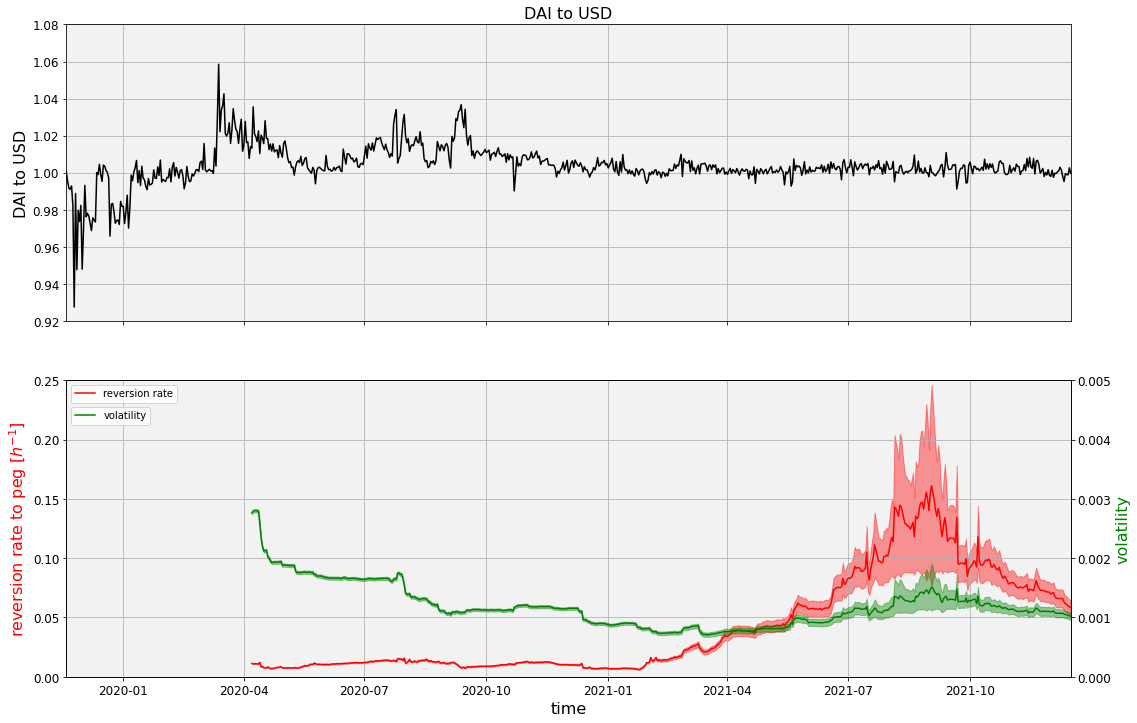

In [9]:
fig, axes, secax = createBasicAnalysisPlot(df=daiusd, title="DAI to USD", price_dev=0.08)
plt.show()

USD Terra to USD

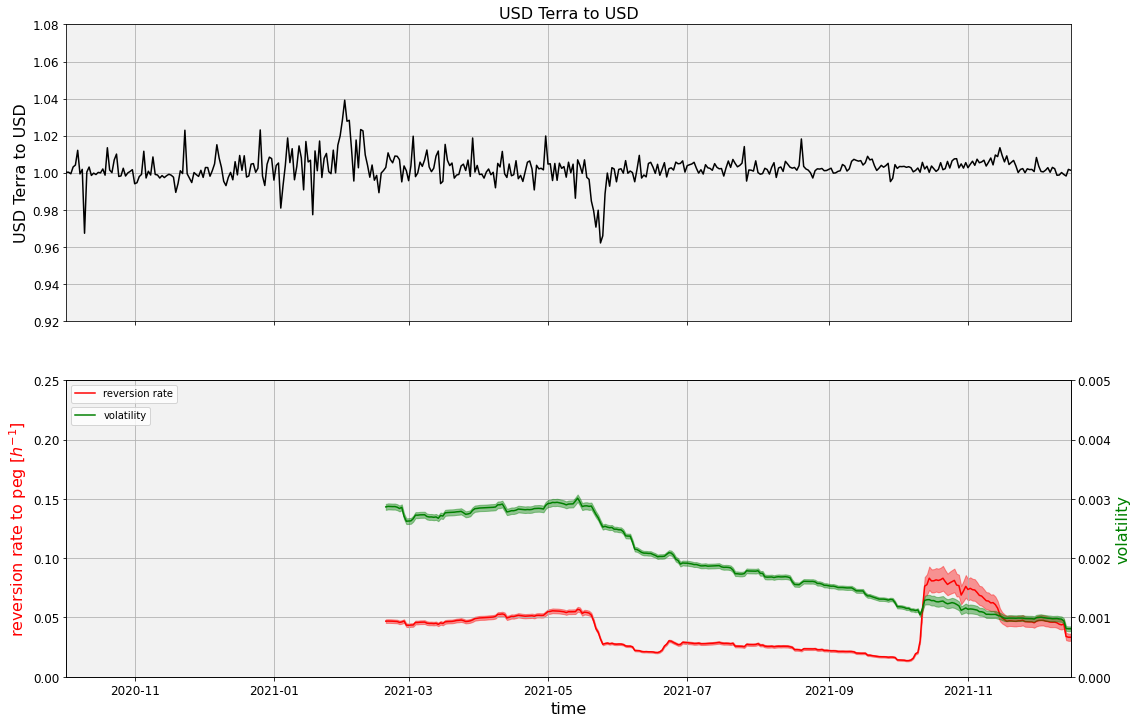

In [10]:
fig, axes, secax = createBasicAnalysisPlot(df=ustusd, title="USD Terra to USD", price_dev=0.08)
plt.show()

FRAX to USD

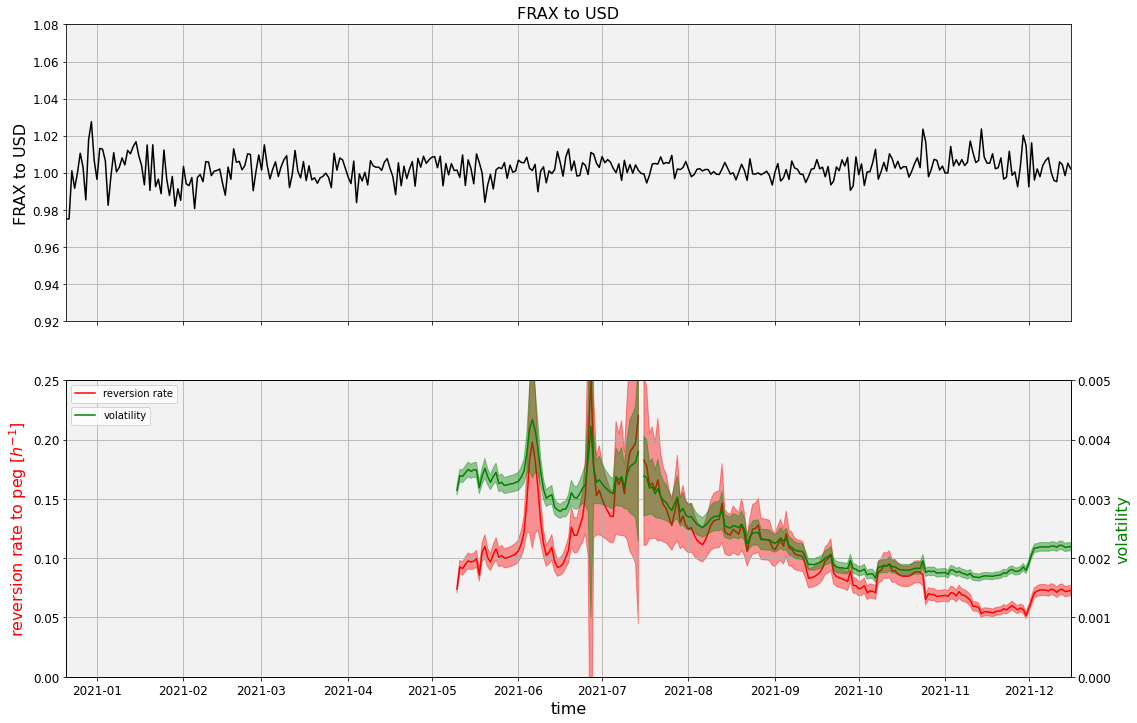

In [11]:
fig, axes, secax = createBasicAnalysisPlot(df=fraxusd, title="FRAX to USD", price_dev=0.08)
plt.show()

MIM to USD

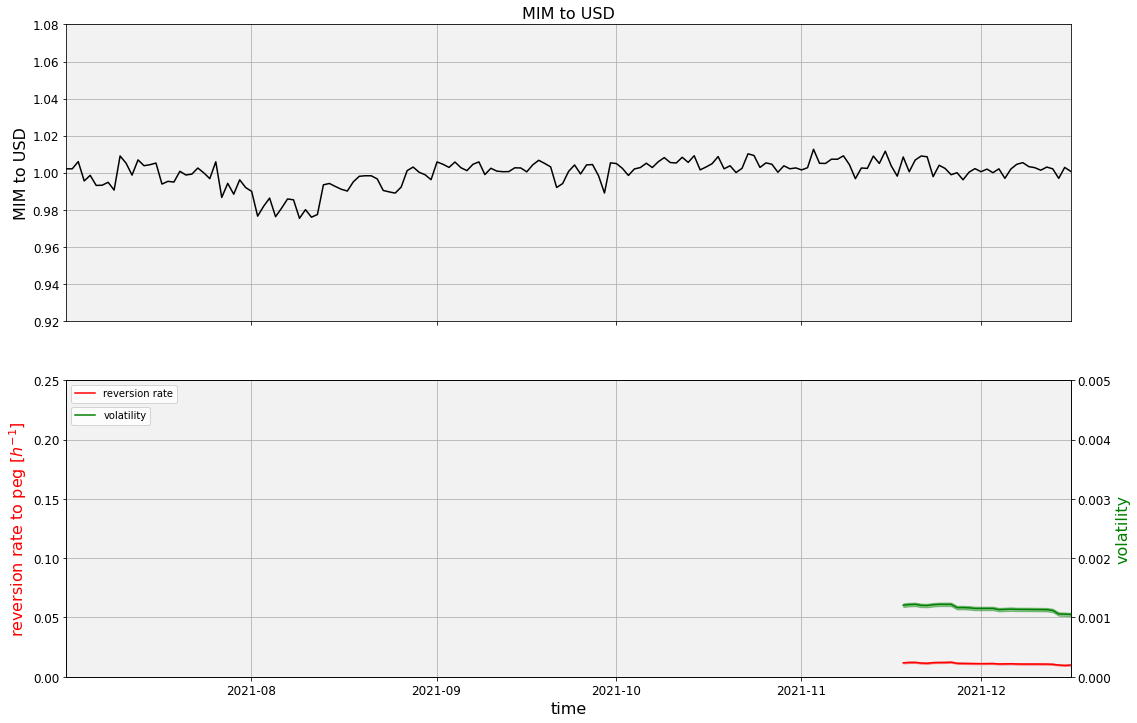

In [12]:
fig, axes, secax = createBasicAnalysisPlot(df=mimusd, title="MIM to USD", price_dev=0.08)
plt.show()

# Crypto-collateral-backed Stablecoins

# Algorithmic Stablecoins

# Appendix

During normal operations the stability of a stablecoin is a question of arbitrage. Arbitrage is what keeps asset-backed stablecoins stable and the degree to which arbitrage is not working frictionlessly can be taken as one measure of instability. 

When an arbitrage opportunity appears somewhere, sooner or later it will be exploited under a certain risk taken by the arbitrageurs. A perfect market with no friction (fees, laws etc) will have the arbitrage opportunity exploited instantly, or conversely every tiniest deviation from the market equilibrium is instantly met with equilibration. A market with low friction will have those exploits take place on a rather short time scale, whereas in a market with a high friction it will be a longer time scale. In our case the market opens up for arbitrage, if the stablecoin can be traded at different prices across trading platforms. The rate at which such opportunities are exploited is therefore a good measure for the instability of the stablecoin. 

We can try to model the stochastic stablecoin price evolution under certain assumptions and then fit the relaxation rate parameter to the actual time series data. Let us assume that the pricedeviation from the peg of the stablecoin follows the stochastic process. Here $p_t$ is the price at time $t$ and $q_t = p_t - 1$ is the deviation from the the peg. The stochastic process could for instance take the form:
$$ d q_t = - r q_t dt + \sigma q_t  dW_t$$
The solution to this SDE is:
$$ q_{t+\Delta} = q_{t} \exp \left[ - r \Delta - \sigma^2\frac{\Delta}{2} + \sigma(W_{t+\Delta} - W_{t})\right]$$
One can consult a standard book on stochastic differential equations (e.g. [Kloeden and Platen](https://books.google.at/books?id=BCvtssom1CMC&printsec=frontcover&hl=de&source=gbs_ge_summary_r&cad=0#v=onepage&q&f=false)) to find the solution for the first and second moment. The mean, i.e. the first moment, is given by:
$$ \mu_{t+\Delta} = q_t \exp[- r \Delta] $$
Note that this is a function of $q_{t}$ and could be written as $\mu_{t+\Delta}(q_t)$. The variance, i.e. the second central moment, is given by:
$$ Var_{t+\Delta} = q_t^2 \exp[- 2 r \Delta] ( \exp[ \sigma^2 \Delta] -1)$$
Since it, too, is a function of $q_{t}$ it could be written as $Var_{t+\Delta}(q_t)$.

By choosing discrete time steps $\Delta$, e.g. one minute, one hour or one day, we can arrive at the transition probabilities for each time step in this model:

$$ P\left[ q_{t+\Delta}\Big| q_{t} \right] = \frac{1}{\sqrt{2\pi Var_{t+\Delta}}} \exp \left[ - \frac{1}{2}\frac{(q_{t+\Delta} - \mu_{t + \Delta})^2}{Var_{t+\Delta}} \right]$$

in other words $P \sim \mathcal{N}(\mu_{t+\Delta}(q_t), \sqrt{Var_{t+\Delta}(q_t)})$ is normally distributed with mean $\mu_{t+\Delta}(q_t)$ and standard deviation $\sqrt{Var_{t+\Delta}(q_t)}$.

We can now fit intervals of the time series to that model. Since the model is convex in $r$ and $\sigma$, we expect to have a convergent solution. Here we use the maximum likelihood method. Lets sample the time series in $K$ intervals $t_1, t_2, \dots, t_K$, respectively with $L$ time steps:

$$ \mathcal L(r,\sigma) = \sum_{k=1}^K \ln \left( P\left[ q_{t_k},q_{t_k+\Delta}, \dots, q_{t_k+L\Delta} \right] \right) $$

Due to the Markov property we can write this as:

$$\mathcal L(r,\sigma) = \sum_{k=1}^K \sum_{l=1}^{L} \ln \left( P\left[ q_{t_k+l\Delta}|q_{t_k+(l-1)\Delta}\right]\right) + c$$
where $c$ is some additive constant.

The optimization problem then becomes:
$$ \text{find} \quad \hat{r},\hat{\sigma}: \quad \text{such that} \quad \mathcal{L(\hat{r},\hat{\sigma})} = \max_{r,\sigma} \mathcal{L(r,\sigma) } \quad \text{under the constraint that}\quad r, \sigma>0$$



# Some Resources:

- [Tether Arbitrage Risks. Medium article by Alex Krüger](https://medium.com/@alexkruger/tether-arbitrage-the-dollar-peg-7da405f13ffc)
- [Tether Off-peg events. Medium article by Alex Krüger](https://medium.com/hackernoon/tether-bitfinex-saga-illustrated-timeline-2d128a703f9c)

- [Vasicek Interest Rate Model](https://sarit-maitra.medium.com/pca-monte-carlo-simulation-for-vasicek-interest-rate-model-9522858cc89d)